# Como criar gráficos no Pandas?

Inicie importando o panda e a biblioteca matplotlib.  

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

Para este tutorial, vamos usar dados de qualidade do ar, disponibilizado pelo OpenAQ e usando o pacote py-openaq.  
O arquivo air_quality_no2.csv, fornece um conjunto de dados de valores para as estações de medição:
- FR04014 (Paris)
- BETR801 (Antuérpia)
- London Westminster (Londres)

In [ ]:
air_quality = pd.read_csv("../data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


O uso dos parâmetros index_cole e parse_datesda, na função read_csv,  
são usadas para definir a primeira coluna (0) como índice do resultado DataFramee e  
converter as datas na coluna em Timestamp objetos.

Com isso, vamos fazer uma verificação visual rapida.  
Com um DataFrame, o pandas cria por padrão um gráfico de linha para cada uma das colunas com dados numéricos.


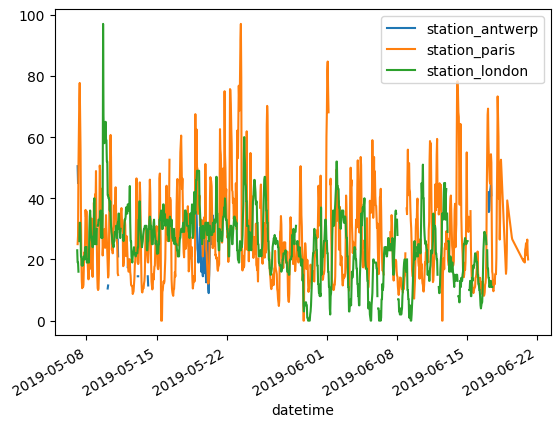

In [5]:
air_quality.plot()
plt.show()

Quero plotar apenas as colunas da tabela de dados com os dados de Paris.

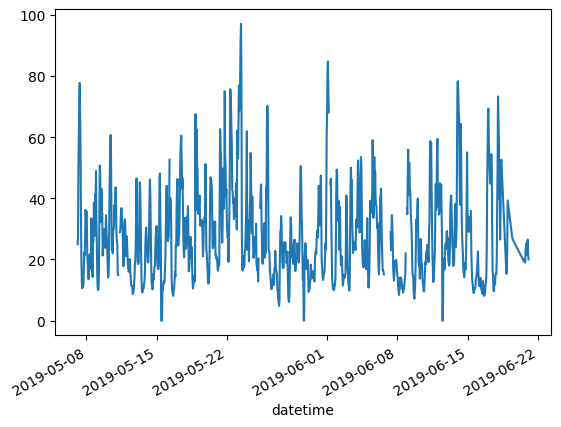

In [6]:
air_quality["station_paris"].plot()
plt.show()

Quero comparar visualmente o valores medidos em Londres versus Paris.

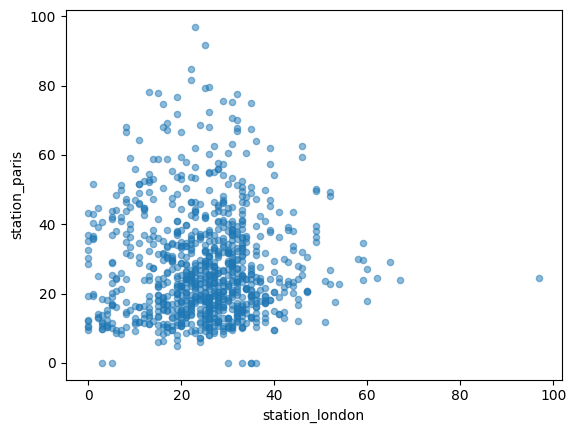

In [7]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)
plt.show()

Além do linegráfico padrão ao usar a função plot, há diversas alternativas disponíveis para plotar dados.  
Vamos usar um pouco de Python padrão para obter uma visão geral dos métodos de plotagem disponíveis:

In [28]:
plot_funcs = [
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]
print(f"Lista das funções: {plot_funcs}")

Lista das funções: ['area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


Uma das opções é DataFrame.plot.box(), que se refere a um boxplot.  
O box método é aplicável aos dados de exemplo de qualidade do ar:

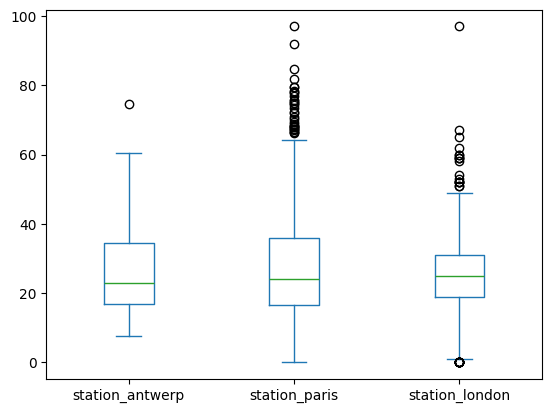

In [29]:
air_quality.plot.box()
plt.show()

Quero cada uma das colunas em uma subtrama separada.  

Subplots separados para cada coluna de dados são suportados pelo argumento subplots das funções plot.  
Vale a pena conferir as opções integradas disponíveis em cada uma das funções do Pandas Plot.

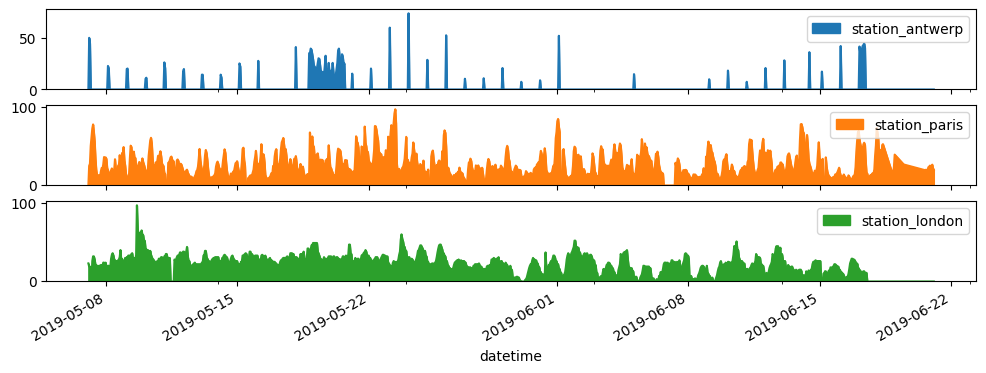

In [30]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)
plt.show()

Quero personalizar ainda mais, estender ou salvar o gráfico resultante.

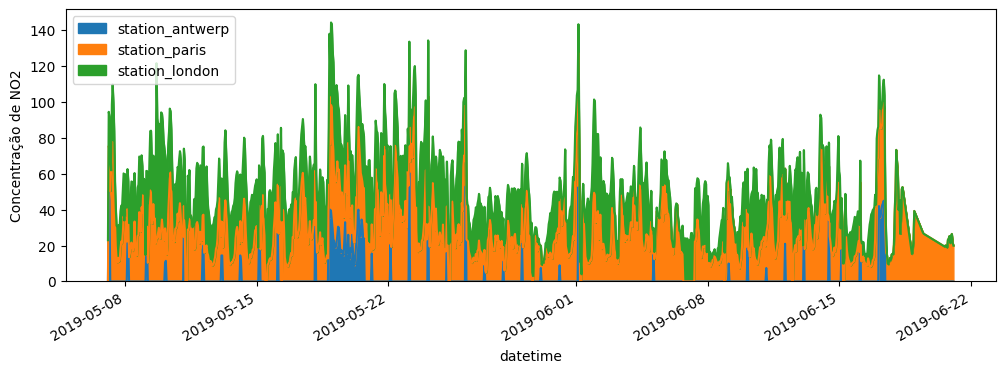

In [34]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("Concentração de NO2")
fig.savefig("../images/no2_concentrations.png")
plt.show()

Cada um dos objetos de plotagem criados pelo pandas é um objeto Matplotlib.  
Como o Matplotlib oferece diversas opções para personalizar plotagens,  
tornar explícito o vínculo entre o pandas e o Matplotlib, 
permite que todo o poder do Matplotlib seja aproveitado na plotagem.  
Essa estratégia é aplicada no exemplo anterior:  

        fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty Matplotlib Figure and Axes
        air_quality.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
        axs.set_ylabel("NO$_2$ concentration")          # Do any Matplotlib customization you like
        fig.savefig("no2_concentrations.png")           # Save the Figure/Axes using the existing Matplotlib method.
        plt.show()                                      # Display the plot

**LEMBRAR**

Os métodos .plot.*, são aplicáveis ​​tanto em séries quanto em DataFrames.  
Por padrão, cada uma das colunas é plotada como um elemento diferente (linha, boxplot,…).  
Qualquer gráfico criado pelo pandas é um objeto Matplotlib.
